C:\Users\Yoges\anaconda3\envs\paddleocr_env\lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
C:\Users\Yoges\anaconda3\envs\paddleocr_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025/05/17 13:52:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Yoges/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Yoges/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320',

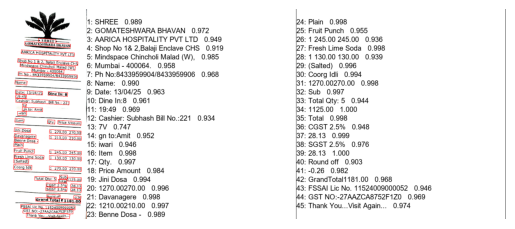

In [1]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
from matplotlib import pyplot as plt
import numpy

# Initialize OCR model (English)
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Supports other langs too

# Path to your image
image_path = r"C:\Users\Yoges\Downloads\Cllg porject\6.jpg"
# Run OCR
results = ocr.ocr(image_path, cls=True)

# Print results
for line in results[0]:
    text = line[1][0]
    score = line[1][1]
    print(f'{text} (Confidence: {score:.2f})')

# OPTIONAL: Draw boxes and text on image
image = cv2.imread(image_path)
boxes = [res[0] for res in results[0]]
txts = [res[1][0] for res in results[0]]
scores = [res[1][1] for res in results[0]]

# Annotate image
annotated = draw_ocr(image, boxes, txts, scores, font_path='C:/Windows/Fonts/arial.ttf')  # Make sure path exists

# Show the result
plt.imshow(annotated)
plt.axis('off')
plt.show()

In [2]:
results

[[[[[218.0, 223.0], [351.0, 232.0], [349.0, 260.0], [216.0, 251.0]],
   ('SHREE', 0.9885733723640442)],
  [[[113.0, 246.0], [462.0, 267.0], [460.0, 296.0], [111.0, 274.0]],
   ('GOMATESHWARA BHAVAN', 0.9715240597724915)],
  [[[86.0, 311.0], [492.0, 334.0], [490.0, 362.0], [85.0, 340.0]],
   ('AARICA HOSPITALITY PVT LTD', 0.9489014148712158)],
  [[[59.0, 378.0], [518.0, 402.0], [517.0, 430.0], [58.0, 406.0]],
   ('Shop No 1& 2,Balaji Enclave CHS', 0.9186607003211975)],
  [[[78.0, 409.0], [498.0, 436.0], [497.0, 466.0], [76.0, 439.0]],
   ('Mindspace Chincholi Malad (W),', 0.9846048355102539)],
  [[[166.0, 449.0], [413.0, 464.0], [411.0, 492.0], [165.0, 478.0]],
   ('Mumbai - 400064.', 0.9581117630004883)],
  [[[63.0, 478.0], [515.0, 502.0], [513.0, 530.0], [61.0, 506.0]],
   ('Ph No:8433959904/8433959906', 0.9675912261009216)],
  [[[39.0, 541.0], [131.0, 549.0], [128.0, 579.0], [36.0, 571.0]],
   ('Name:', 0.9902697801589966)],
  [[[41.0, 616.0], [249.0, 627.0], [248.0, 655.0], [40.0, 6

In [3]:
import re

def is_price(line):
    return bool(re.fullmatch(r'\d+(\.\d{1,2})?', line) or re.fullmatch(r'^(?:\d+(?:\.\d+)?\s*)+$', line))

def is_item_name(line):
    return bool(re.search(r'[A-Za-z]', line))

result = results[0]
# Step 2: Initialize

def is_address_line(text):
    address_keywords = ['road', 'street', 'lane', 'block', 'no.', 'opp', 'near', 'layout', 'nagar', 'market', 'circle', 'complex', 'building', 
                        'sector', 'phase', 'floor', 'main', 'hotels',  'pvt',  'ltd',  ]
    text_lower = text.lower()
    return any(kw in text_lower for kw in address_keywords) or bool(re.search(r'\d{2,}', text))
    
def is_possible_store_line(text):
    """Likely a store name if mostly letters and not a number-heavy address."""
    return (
        bool(re.search(r'[A-Za-z]', text)) and  # must contain letters
        not bool(re.search(r'\d{2,}', text)) and  # should not have large numbers
        len(text.split()) <= 4  # limit overly long lines
        and not is_address_line(line)
    )

# Smart Store Name Detection from first few lines
store_name_lines = []
for i in range(min(5, len(result))):
    line = result[i][1][0].strip()
    if is_possible_store_line(line):
        store_name_lines.append(line)
    elif is_address_line(line):
        break  # Stop if address-like line is found

store_name = ' '.join(store_name_lines)

def is_city_name(text):
        return bool(re.search(r'([A-Za-z ]+)[\s\-]+(\d{2,6})', text))

cities = ["Mumbai", "Delhi", "Bengaluru", "Hyderabad", "Ahmedabad", "Chennai", "Kolkata", "Surat", "Pune", "Jaipur"]
city = ''
for i in range(min(10, len(result))):
    line = result[i][1][0].strip()
    if is_city_name(line):
        for city in cities:
            if city.lower() in line.lower():
                city = city
                break

total_keywords = ['grand total', 'total', 'total mrp', 'total amount', 'amount payable', 'amount due', 'food total']
total = ""

# Loop from bottom to top
for i in range(len(result) - 1, 0, -1):
    current_line = result[i][1][0].strip().lower()
    prev_line = result[i - 1][1][0].strip().lower()

    # Check if current line is a numeric value
    if re.match(r'^\d+(\.\d{2})?$', current_line):
        # Check if the previous line has a total-related keyword
        if any(k in prev_line for k in total_keywords):
            total = current_line
            break
        

date = ""
items = []


# Keywords to identify sections
item_header_keywords = ['description', 'item', 'qty', 'quantity', 'price', 'amount', 'amt', 'mrp', 'rate']
item_stop_keywords = ['total', 'subtotal', 'sub total' 'amount due', 'balance', 'total inclusive gst', 'total salas (inclusive of gst)', 'sub total', 'sub', 'cgst', 'sgst']

parsing_items = False
i = 0
while i < len(result):
    text = result[i][1][0].strip()
    text_lower = text.lower()

    # Step 3: Extract Date
    if not date:
        match = re.search(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', text)
        if match:
            date = match.group(0)

    # Step 4: Detect start of item section
    if any(k in text_lower for k in item_header_keywords):
        parsing_items = True
        i += 1
        continue
        
    # Step 6: End item parsing if total line encountered
    if any(k in text_lower for k in item_stop_keywords):
        parsing_items = False

    
                        
    # Step 5: Parse items — using the updated logic from simplified text-based version
    if parsing_items:
        current = result[i][1][0].strip()
        if i + 1 < len(result):
            next_line = result[i + 1][1][0].strip()
        else:
            next_line = ""
    
        if not is_price(current):
            if is_price(next_line):
                # New item starts
                items.append(current)
            else:
                # Continuation of previous item
                if items:
                    items[-1] += ' ' + current
                else:
                    items.append(current)  # Fallback safety
    
        i += 1
        continue        
    i += 1
                                       

# Output
print("Store Name:", store_name)
print("City:", city)
print("Date:", date)
print("Items:")
for item in items:
    print(f"  - {item}")
print("Total:", total)

Store Name: SHREE GOMATESHWARA BHAVAN
City: Mumbai
Date: 13/04/25
Items:
  - Jini Dosa
  - Davanagere Benne Dosa - Plain
  - Fruit Punch
  - Fresh Lime Soda (Salted)
  - Coorg Idli
Total: 1125.00


####  Zero-Shot Classification with Transformers Model

In [22]:
from transformers import pipeline

# Load the zero-shot-classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cpu


In [23]:
import json

categories = [
    "food", "medicine", "electronics", "household", "clothing", "beverage", "juice", "vegetable",
    "dairy", "sweets", "sauce", "fruits", "meat", "seafood", "salad", "soup", "herb"
]

classified_items = []
for item in items:
    result = classifier(item, candidate_labels=categories)
    top_category = result["labels"][0]
    classified_items.append({
        "item": item,
        "category": top_category
    })

receipt_json = {
    "store_name": store_name,
    "date": date,
    "total": total,
    "items": classified_items
}

# Print JSON
print(json.dumps(receipt_json, indent=2))

{
  "store_name": "SHREE GOMATESHWARA BHAVAN",
  "date": "13/04/25",
  "total": "1125.00",
  "items": [
    {
      "item": "Jini Dosa",
      "category": "food"
    },
    {
      "item": "Davanagere Benne Dosa - Plain",
      "category": "food"
    },
    {
      "item": "Fruit Punch",
      "category": "beverage"
    },
    {
      "item": "Fresh Lime Soda (Salted)",
      "category": "beverage"
    },
    {
      "item": "Coorg Idli",
      "category": "dairy"
    }
  ]
}


### Dataset Cleaning and Preprocessing

In [16]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Datasets/home_sdf_marketing_sample_for_amazon_in-ecommerce.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Categories  30000 non-null  object
 1   Items       30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [23]:
# Function to clean brand name from product title
def remove_brand_from_title(title, brand):
    if pd.isna(title) or pd.isna(brand):
        return title
    # Escape special regex characters in brand, ignore case
    pattern = re.compile(re.escape(brand), re.IGNORECASE)
    return pattern.sub('', title).strip()

# Apply the function row-wise
df['Product Title'] = df.apply(
    lambda row: remove_brand_from_title(row['Product Title'], row['Brand']),
    axis=1
)

In [26]:
df.drop(columns=['Brand'], inplace=True)

In [28]:
df.rename(columns={'Product Title': 'Items'}, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Categories  30000 non-null  object
 1   Items       30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [31]:
# Save cleaned data
df.to_csv("Datasets/home_sdf_marketing_sample_for_amazon_in-ecommerce.csv", index=False)

In [32]:
df.head()

,Categories,Items
0,Skin Care,Lactic Acid 60% Anti ageing Pigmentation Remov...
1,Skin Care,Branded New 1.5mm Titanium 1200 needles Micro...
2,Skin Care,1 Pc brand snail eye cream remove dark circle ...
3,Skin Care,Anti Snoring Snore Stopper Sleep Apnea Solutio...
4,Grocery & Gourmet Foods,Crunchy & Creame Gourmet Delicacies Cream Wafe...


In [38]:
df.isna().sum()

Categories    0
Items         0
dtype: int64

In [33]:
df2 = pd.read_csv('Datasets/DMart_Product.csv')

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Items       5188 non-null   object
 1   Categories  5186 non-null   object
dtypes: object(2)
memory usage: 81.2+ KB


In [45]:
df2.dropna(inplace=True)

In [46]:
df2.isna().sum()

Items         0
Categories    0
dtype: int64

In [42]:
df3 = pd.read_csv('Datasets/BigBasket Product.csv')

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Items       27554 non-null  object
 1   Categories  27555 non-null  object
dtypes: object(2)
memory usage: 430.7+ KB


In [48]:
df3.dropna(inplace=True)

In [49]:
df3.isna().sum()

Items         0
Categories    0
dtype: int64

In [54]:
df4 = pd.read_csv('Datasets/ANUVAAD_INDB_2024.csv')

In [55]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Items       2087 non-null   object
 1   Categories  897 non-null    object
dtypes: object(2)
memory usage: 32.7+ KB


In [58]:
df4.dropna(inplace = True)

In [59]:
df4.isna().sum()

Items         0
Categories    0
dtype: int64

In [67]:
df5 = pd.read_csv('Datasets/flipkart_com-ecommerce.csv')

In [68]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Items       20000 non-null  object
 1   Categories  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [69]:
# Clean the 'Categories' column to extract only the first part before '>>>'
df5['Categories'] = df5['Categories'].str.extract(r'"([^>]+)\s*>>')

In [70]:
df5.head()

,Items,Categories
0,Alisha Solid Women's Cycling Shorts,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,Furniture
2,AW Bellies,Footwear
3,Alisha Solid Women's Cycling Shorts,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies


In [71]:
df5.isna().sum()

Items           0
Categories    328
dtype: int64

In [73]:
df5.dropna(inplace = True)

In [74]:
df5.isna().sum()

Items         0
Categories    0
dtype: int64

In [76]:
df5.to_csv('Datasets/flipkart_com-ecommerce.csv', index=False)

In [77]:
df6 = pd.read_csv('Datasets/indian_food.csv')

In [78]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Items   255 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [79]:
# Add a new column 'Categories' with the value 'Food' for all rows
df6['Categories'] = 'Food'

In [80]:
df6.head()

,Items,Categories
0,Balu shahi,Food
1,Boondi,Food
2,Gajar ka halwa,Food
3,Ghevar,Food
4,Gulab jamun,Food


In [81]:
df6.isna().sum()

Items         0
Categories    0
dtype: int64

In [82]:
df6.to_csv('Datasets/indian_food.csv', index=False)

- Merging all dataset to make one dataset 

In [83]:
combined_df = pd.concat([df, df2], ignore_index=True)

In [84]:
combo_df2 = pd.concat([combined_df, df3], ignore_index=True)

In [85]:
combo_df3 = pd.concat([combo_df2, df4], ignore_index=True)

In [87]:
combo_df4 = pd.concat([combo_df3, df5], ignore_index=True)

In [88]:
combo_df5 = pd.concat([combo_df4, df6], ignore_index=True)

In [90]:
combo_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83563 entries, 0 to 83562
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Categories  83563 non-null  object
 1   Items       83563 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [92]:
combo_df5.isna().sum()

Categories    0
Items         0
dtype: int64

In [93]:
combo_df5.head()

,Categories,Items
0,Skin Care,Lactic Acid 60% Anti ageing Pigmentation Remov...
1,Skin Care,Branded New 1.5mm Titanium 1200 needles Micro...
2,Skin Care,1 Pc brand snail eye cream remove dark circle ...
3,Skin Care,Anti Snoring Snore Stopper Sleep Apnea Solutio...
4,Grocery & Gourmet Foods,Crunchy & Creame Gourmet Delicacies Cream Wafe...


In [94]:
combo_df5.to_csv('Datasets/combined_datasets.csv', index=False)

In [32]:
df = pd.read_csv("Datasets/combined_datasets.csv")

In [33]:
df['Categories'].unique()

array(['Skin Care', 'Grocery & Gourmet Foods', 'Bath & Shower',
       'Fragrance', 'Hair Care', 'Detergents & Dishwash', 'Grocery',
       'Personal Care', 'Packaged Food', 'DMart Grocery',
       'Dairy & Beverages', 'Fruits & Vegetables', 'Home & Kitchen',
       'Specials', 'Kitchen Aprons', 'Appliances', 'Wonderchef',
       'Water Purifiers & Accessories', 'Tableware', 'Butterfly',
       'Joyo Plastics', 'Geep', 'Zebronics', 'Beauty & Cosmetics',
       'Syska', 'Pigeon', 'Clothing & Accessories', 'School Supplies',
       'Backpacks', 'Computer Accessories', 'Plant Container',
       'Motorbike Helmets', 'Smartwatches', 'Raincoat', 'Baby & Kids',
       'Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Eggs, Meat & Fish',
       'Cereals and millets', 'Grain legumes', 'Green leafy vegetables',
       'Other ve

In [36]:
df.dropna(inplace = True)

In [38]:
df7 = pd.read_csv('Datasets/chinese_foods.csv')

In [39]:
combo_df6 = pd.concat([df, df7], ignore_index=True)

In [46]:
categories_to_replace = [
    'Foodgrains, Oil & Masala',
    'Miscellaneous foods',
    'Snacks & Branded Foods',
    'Gourmet & World Food'
]

# Replace them with "Food"
combo_df6['Categories'] = combo_df6['Categories'].replace(categories_to_replace, 'Food')

In [47]:
combo_df6.to_csv('Datasets/combined_datasets.csv', index=False)

### Model

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier 

In [49]:
# Step 1: Load dataset
df = pd.read_csv("Datasets/combined_datasets.csv")
df.columns = df.columns.str.strip()  # Clean up any trailing spaces
items = df['Items'].astype(str)
labels = df['Categories'].astype(str)

In [50]:
# Step 2: Generate sentence embeddings
embedder = SentenceTransformer('all-MiniLM-L6-v2')
X = embedder.encode(items.tolist(), convert_to_tensor=False)
y = labels

In [51]:
X

array([[ 0.0108903 , -0.04735088,  0.02392284, ..., -0.07690982,
         0.12255303,  0.00421278],
       [-0.05889716,  0.04572695,  0.04943972, ..., -0.09138113,
        -0.00755367,  0.07929958],
       [ 0.00057887,  0.03683621,  0.0976506 , ..., -0.03232253,
         0.09718049, -0.018818  ],
       ...,
       [-0.06076991,  0.05895617, -0.00748705, ..., -0.04769173,
         0.01153347,  0.04236368],
       [-0.10195896,  0.15198433, -0.07337969, ..., -0.06070068,
        -0.02954369, -0.02742251],
       [ 0.0012181 , -0.04829464, -0.02955265, ...,  0.00278188,
        -0.02942971,  0.01944394]], dtype=float32)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [53]:
lg_models = LogisticRegression(max_iter=1000)
lg_models.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
y_pred = lg_models.predict(X_test)

In [55]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                                    precision    recall  f1-score   support

                       Animal meat       1.00      0.52      0.69        23
                        Appliances       1.00      0.18      0.31        11
                       Automotive        0.93      0.95      0.94       212
                         Baby Care       0.80      0.70      0.75       111
                        Baby Care        0.85      0.75      0.80        91
                         Backpacks       0.00      0.00      0.00         3
            Bags, Wallets & Belts        0.69      0.77      0.73        56
             Bakery, Cakes & Dairy       0.63      0.34      0.44       169
                     Bath & Shower       0.52      0.32      0.39       442
                Beauty & Cosmetics       0.00      0.00      0.00        12
                  Beauty & Hygiene       0.67      0.73      0.70      1620
         Beauty and Personal Care        0.80      0.52      0.6

### Random Forest

In [56]:
rf_models = RandomForestClassifier(n_estimators=100)
rf_models.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rf_models.predict(X_test)

In [58]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                                    precision    recall  f1-score   support

                       Animal meat       1.00      0.09      0.16        23
                        Appliances       1.00      0.36      0.53        11
                       Automotive        0.98      0.89      0.93       212
                         Baby Care       0.86      0.50      0.64       111
                        Baby Care        0.98      0.67      0.80        91
                         Backpacks       0.00      0.00      0.00         3
            Bags, Wallets & Belts        1.00      0.62      0.77        56
             Bakery, Cakes & Dairy       1.00      0.22      0.37       169
                     Bath & Shower       0.64      0.12      0.21       442
                Beauty & Cosmetics       0.00      0.00      0.00        12
                  Beauty & Hygiene       0.69      0.76      0.72      1620
         Beauty and Personal Care        0.98      0.48      0.6

### KNN

In [59]:
knn_models = KNeighborsClassifier(n_neighbors=5)
knn_models.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred = knn_models.predict(X_test)

In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                                    precision    recall  f1-score   support

                       Animal meat       0.86      0.78      0.82        23
                        Appliances       0.78      0.64      0.70        11
                       Automotive        0.97      0.96      0.96       212
                         Baby Care       0.78      0.85      0.81       111
                        Baby Care        0.84      0.80      0.82        91
                         Backpacks       1.00      0.67      0.80         3
            Bags, Wallets & Belts        0.84      0.88      0.86        56
             Bakery, Cakes & Dairy       0.67      0.78      0.72       169
                     Bath & Shower       0.52      0.44      0.48       442
                Beauty & Cosmetics       0.11      0.08      0.10        12
                  Beauty & Hygiene       0.70      0.85      0.77      1620
         Beauty and Personal Care        0.85      0.67      0.7

### XGBoost

In [8]:
# Load the dataset
df = pd.read_csv("Datasets/combined_datasets.csv")

# Drop rows with missing values
df.dropna(subset=['Items', 'Categories'], inplace=True)

# Encode target labels
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Categories'])

# Extract features and target
X = df['Items'].astype(str).tolist()
y = df['Category_encoded']

# Generate sentence embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
X_embeddings = model.encode(X)

In [9]:
label_counts = pd.Series(y).value_counts()
valid_labels = label_counts[label_counts >= 2].index
mask = pd.Series(y).isin(valid_labels)

# Filter both features and labels
X_embeddings_filtered = [X_embeddings[i] for i in range(len(X_embeddings)) if mask.iloc[i]]
y_filtered = y[mask].reset_index(drop=True)

# Re-encode labels to be consecutive integers starting from 0
le_new = LabelEncoder()
y_filtered_encoded = le_new.fit_transform(y_filtered)

In [10]:
# Train-test split (after filtering)
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings_filtered, y_filtered_encoded, test_size=0.2, stratify=y_filtered_encoded, random_state=42
)


# Define and train the model
xg_models = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xg_models.fit(X_train, y_train)

# Predict and evaluate 
y_pred = xg_models.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

### Pickle file knn model

In [62]:
import pickle

# Save the trained KNN model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn_models, f)

print("KNN model saved to knn_model.pkl")

KNN model saved to knn_model.pkl


Using Model to make category

In [19]:
import pickle
import json
from sentence_transformers import SentenceTransformer

# Step 1: Load KNN model
with open("knn_model.pkl", "rb") as f:
    knn_model = pickle.load(f)

# Step 2: Generate embeddings for items
embedder = SentenceTransformer("all-MiniLM-L6-v2")
item_embeddings = embedder.encode(items)

# Step 3: Predict categories
predicted_categories = knn_model.predict(item_embeddings)

# Step 4: Construct JSON output
output = {
    "store_name": store_name,
    "date": date,
    "total": total,
    "items": [
        {"item": item, "category": category}
        for item, category in zip(items, predicted_categories)
    ]
}

# Print the structured JSON
print(json.dumps(output, indent=2))

{
  "store_name": "BEYOND Wine & Dine",
  "date": "06/05/25",
  "total": "1480",
  "items": [
    {
      "item": "FETA CHEESE CIGAR ROLLS 1",
      "category": "Food"
    },
    {
      "item": "THREE CHEESE CHILLY TOAST",
      "category": "Food"
    },
    {
      "item": "COTTAGE CHEESE OYSTER CHILLI GRAVY",
      "category": "Food"
    },
    {
      "item": "VEG FRIED RICE",
      "category": "Food"
    },
    {
      "item": "CRANBERRY DELIGHT",
      "category": "Food"
    }
  ]
}


### DataBase

In [22]:
import oracledb
from datetime import datetime

def insert_receipt_to_oracle(receipt_data):
    try:
        # Connect to Oracle DB (ensure Oracle Instant Client is installed and configured if using thick mode)
        connection = oracledb.connect(
            user="system",
            password="user",
            dsn="localhost:1521/xe"  # Use service name instead of SID for oracledb
        )
        cursor = connection.cursor()

         # Convert date to datetime object
        date_obj = datetime.strptime(receipt_data["date"], "%d/%m/%y")
        total = float(receipt_data["total"])

        # Insert into receipts table and return ID
        receipt_id = cursor.var(int)

        cursor.execute("""
            INSERT INTO receipts (store_name, city, receipt_date, total)
            VALUES (:store_name, :city, :receipt_date, :total)
            RETURNING id INTO :receipt_id
        """, {
            "store_name": receipt_data["store_name"],
            "city": receipt_data.get("city", "Unknown"),
            "receipt_date": date_obj,
            "total": total,
            "receipt_id": receipt_id
        })

        receipt_id_value = int(receipt_id.getvalue()[0])


        # Insert items
        for item in receipt_data["items"]:
            cursor.execute("""
                INSERT INTO receipt_items (receipt_id, item_name, category)
                VALUES (:receipt_id, :item_name, :category)
            """, {
                "receipt_id": receipt_id_value,
                "item_name": item["item"],
                "category": item["category"]
            })


        connection.commit()
        print("Data inserted successfully.")

    except Exception as e:
        print("Error inserting data:", e)
        connection.rollback()
    finally:
        cursor.close()
        connection.close()

In [23]:
insert_receipt_to_oracle(output)

Data inserted successfully.


### Experiments

In [ ]:
pip install easyocr

In [2]:
imagepath = r'C:\Users\Yoges\Downloads\Cllg porject\WhatsApp Image 2025-05-02 at 11.47.51_87548eb4.jpg'

In [3]:
import easyocr
import cv2
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  # Upscale 2x
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 3)  # Reduce noise
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def extract_text_easyocr(image_array):
    reader = easyocr.Reader(['en'])  # Load once if doing multiple images
    results = reader.readtext(image_array)
    
    # Combine detected text lines
    extracted_text = "\n".join([text for _, text, _ in results])
    return extracted_text

# Example usage
processed = preprocess_image(imagepath)
text = extract_text_easyocr(processed)
print(text)

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
